In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Here we compare hetero-synaptic delays side by side.


In [2]:
from LSD.model import LSD_neuron
from LSD.plot import plot_spiketrains, histogram

# Testing different weights and delays:

In [3]:
from LSD import *

A_est = A_true
B_est = B_true
tau_est = tau 

In [4]:
from LSD.tuning import vonmises, get_latency

def get_delay_line(N_inputs, A=A_est, B=B_est, tau_est=tau_est, theta=0.):
    current = A * vonmises(N_inputs, theta=theta, B=B)
    spike_times = get_latency(None, current, tau=tau_est, t_start=0.)
    spike_times = np.array([lat[0] if len(lat)>0 else np.nan for lat in spike_times])
    tau_max = np.nanmax(spike_times)
    delay_line = tau_max - spike_times
    return delay_line

In [5]:
from scipy.linalg import toeplitz
def get_weights_and_delays(N_inputs, A_est, B_est, weight_0, delay_0, do_hetero):
    if not do_hetero:
        delays = delay_0 * np.ones((N_inputs, N_inputs))

        tf = vonmises(N_inputs, theta=.0, B=B_est)
        tf /= tf.sum()
        tf -= tf.mean()
        
        weights = weight_0_ * toeplitz(tf)
    else:
        delay_line = get_delay_line(N_inputs, A_est, B_est)
        delays = delay_min + toeplitz(np.where(np.isnan(delay_line), 0, delay_line))
        
        if True:
            tf = vonmises(N_inputs, theta=.0, B=B_est)
            tf = np.where(np.isnan(delay_line), 0., tf)
        else:
            tf = np.where(np.isnan(delay_line), 0., 1.)
        tf /= tf.sum()
        tf -= tf.mean()
        weights = weight_0_ * toeplitz(tf)
    return weights, delays

## Testing different base weights:

weight_0_=5.000
weight_0_=7.071
weight_0_=10.000
weight_0_=14.142
weight_0_=20.000


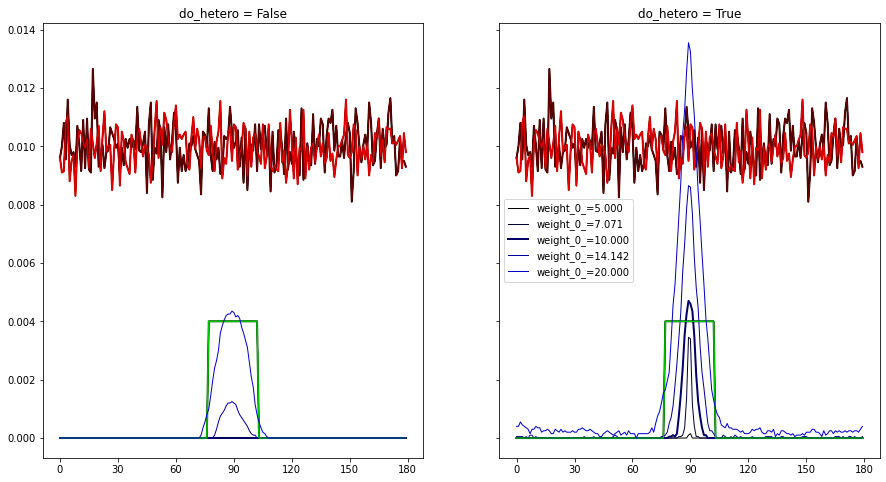

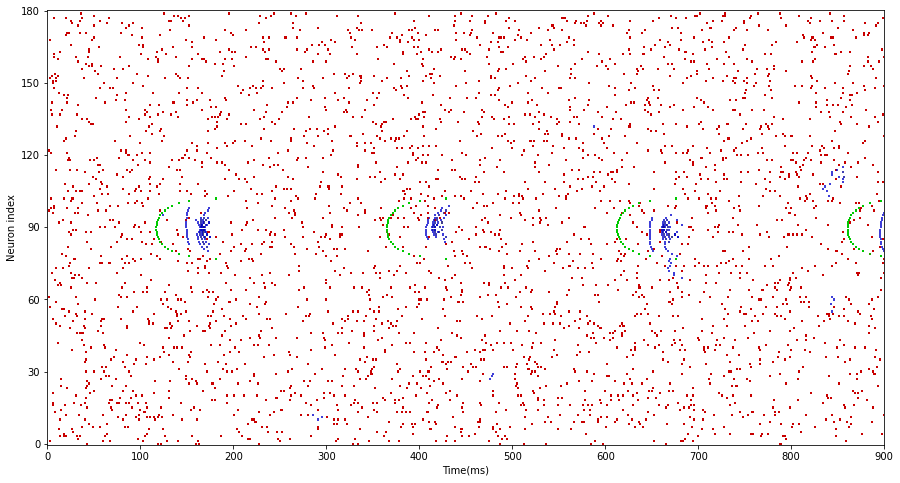

In [6]:
fig, ax = None, None
hfig, haxs = plt.subplots(1, 2, figsize=figsize, sharey=True)
for i_scan, weight_0_ in enumerate(weight_0*np.logspace(-1, 1, N_scan, base=2, endpoint=True)):
    label = f'{weight_0_=:.3f}'
    print(label)
    for i_ax, do_hetero in enumerate([False, True]):
        weights, delays = get_weights_and_delays(N_inputs, A_est, B_est, weight_0_, delay_0, do_hetero)
        fig, ax, output = LSD_neuron(weights, delays, fig=fig, ax=ax, sat=i_scan/N_scan)
        hfig, haxs[i_ax] = histogram(output, fig=hfig, ax=haxs[i_ax], sat=i_scan/N_scan, label=label, lw=2 if i_scan==N_scan//2 else 1)    
for i_ax, do_hetero in enumerate([False, True]):  haxs[i_ax].set_title('do_hetero = ' + str(do_hetero))
haxs[i_ax].legend(loc='best');    

delay_0_=6.250
delay_0_=12.500
delay_0_=25.000
delay_0_=50.000
delay_0_=100.000


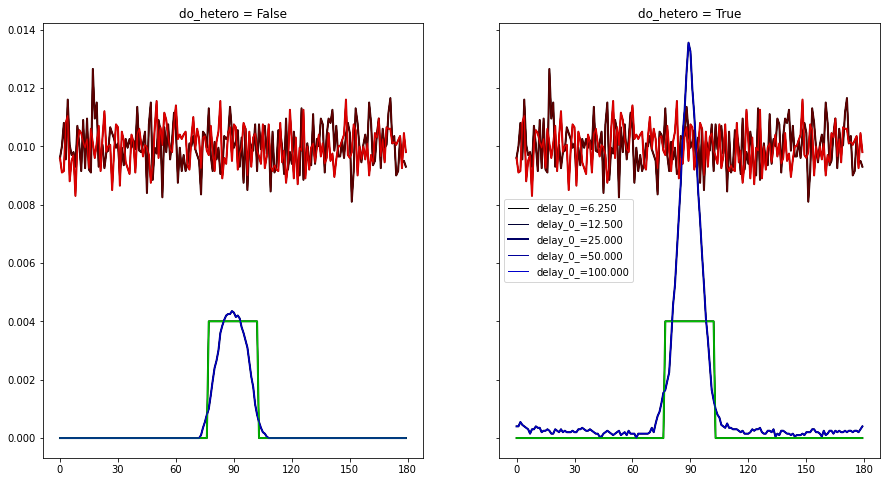

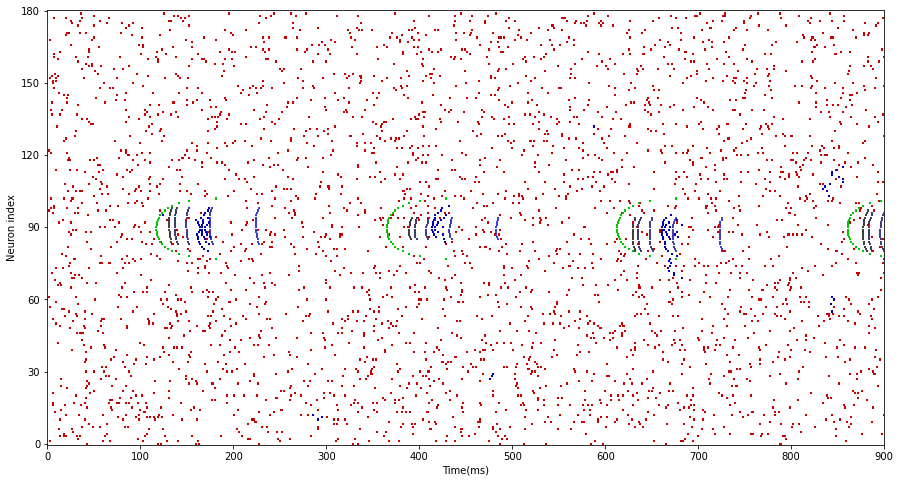

In [7]:
fig, ax = None, None
hfig, haxs = plt.subplots(1, 2, figsize=figsize, sharey=True)
for i_scan, delay_0_ in enumerate(delay_0*np.logspace(-1, 1, N_scan, base=4)):
    label = f'{delay_0_=:.3f}'
    print(label)
    for i_ax, do_hetero in enumerate([False, True]):
        weights, delays = get_weights_and_delays(N_inputs, A_est, B_est, weight_0, delay_0_, do_hetero)
        fig, ax, output = LSD_neuron(weights, delays, fig=fig, ax=ax, sat=i_scan/N_scan)
        hfig, haxs[i_ax] = histogram(output, fig=hfig, ax=haxs[i_ax], sat=i_scan/N_scan, label=label, lw=2 if i_scan==N_scan//2 else 1)    
for i_ax, do_hetero in enumerate([False, True]):  haxs[i_ax].set_title('do_hetero = ' + str(do_hetero))
haxs[i_ax].legend(loc='best');    

## Testing different tuning bandwidths:

B_est_=0.125
B_est_=0.250
B_est_=0.500
B_est_=1.000
B_est_=2.000


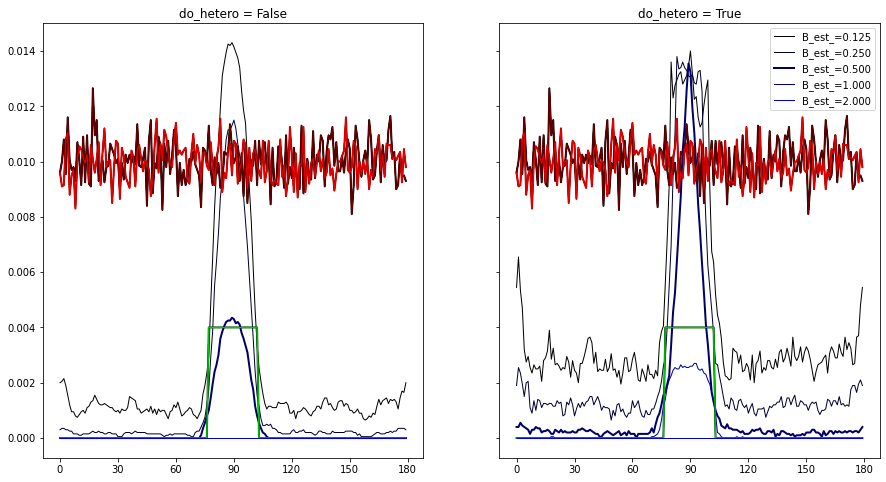

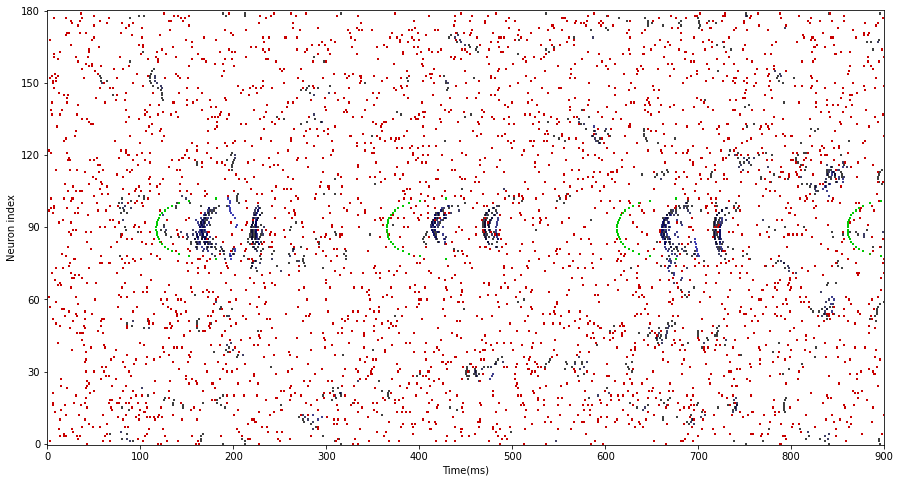

In [8]:
fig, ax = None, None
hfig, haxs = plt.subplots(1, 2, figsize=figsize, sharey=True)
for i_scan, B_est_ in enumerate(B_est*np.logspace(-1, 1, N_scan, base=4)):
    label = f'{B_est_=:.3f}'
    print(label)
    for i_ax, do_hetero in enumerate([False, True]):
        weights, delays = get_weights_and_delays(N_inputs, A_est, B_est_, weight_0, delay_0_, do_hetero)
        fig, ax, output = LSD_neuron(weights, delays, fig=fig, ax=ax, sat=i_scan/N_scan)
        hfig, haxs[i_ax] = histogram(output, fig=hfig, ax=haxs[i_ax], sat=i_scan/N_scan, label=label, lw=2 if i_scan==N_scan//2 else 1)    
for i_ax, do_hetero in enumerate([False, True]):  haxs[i_ax].set_title('do_hetero = ' + str(do_hetero))
haxs[i_ax].legend(loc='best');    

B_true_=0.125
B_true_=0.250
B_true_=0.500
B_true_=1.000
B_true_=2.000


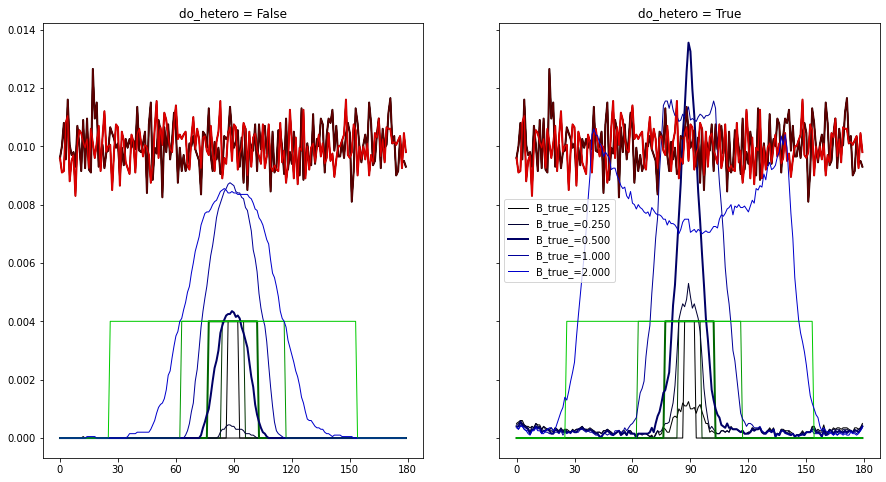

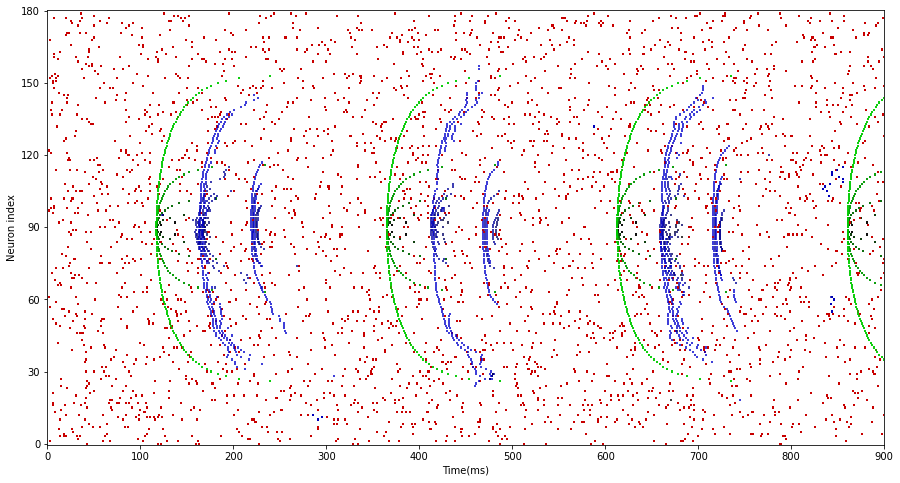

In [9]:
fig, ax = None, None
hfig, haxs = plt.subplots(1, 2, figsize=figsize, sharey=True)
for i_scan, B_true_ in enumerate(B_true*np.logspace(-1, 1, N_scan, base=4)):
    label = f'{B_true_=:.3f}'
    print(label)
    for i_ax, do_hetero in enumerate([False, True]):
        weights, delays = get_weights_and_delays(N_inputs, A_est, B_est, weight_0, delay_0_, do_hetero)
        fig, ax, output = LSD_neuron(weights, delays, B_true=B_true_, fig=fig, ax=ax, sat=i_scan/N_scan)
        hfig, haxs[i_ax] = histogram(output, fig=hfig, ax=haxs[i_ax], sat=i_scan/N_scan, label=label, lw=2 if i_scan==N_scan//2 else 1)    
for i_ax, do_hetero in enumerate([False, True]):  haxs[i_ax].set_title('do_hetero = ' + str(do_hetero))
haxs[i_ax].legend(loc='best');    

## Testing different noise levels:

As a  function  of noise lambda_n :

lambda_n_=2.500
lambda_n_=5.000
lambda_n_=10.000
lambda_n_=20.000
lambda_n_=40.000


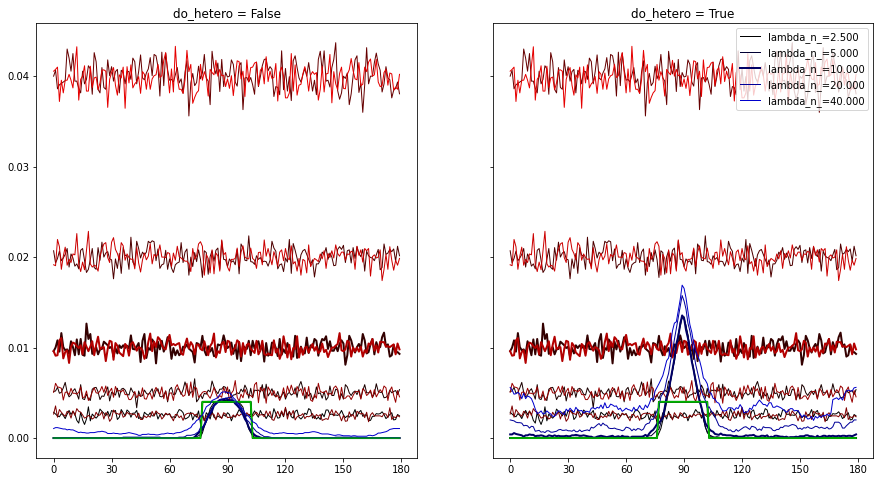

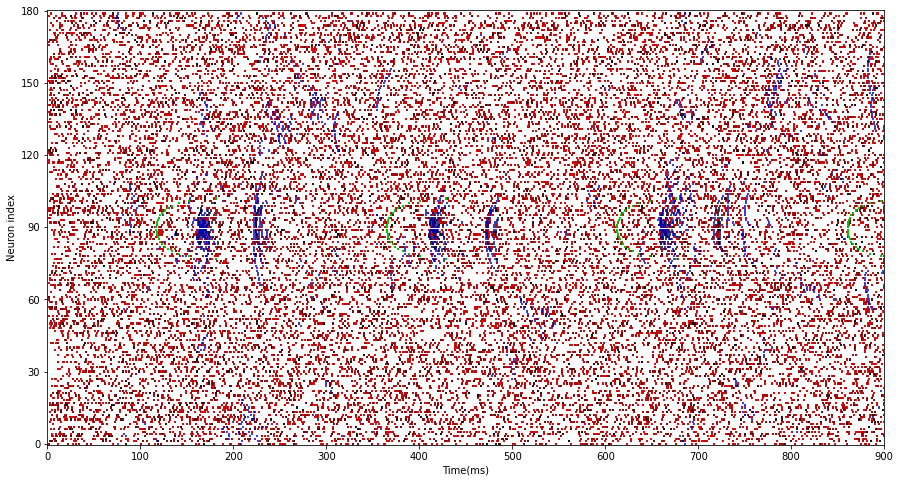

In [10]:
fig, ax = None, None
hfig, haxs = plt.subplots(1, 2, figsize=figsize, sharey=True)
for i_scan, lambda_n_ in enumerate(lambda_n*np.logspace(-1, 1, N_scan, base=4)):
    label = f'{lambda_n_=:.3f}'
    print(label)
    for i_ax, do_hetero in enumerate([False, True]):
        weights, delays = get_weights_and_delays(N_inputs, A_est, B_est, weight_0, delay_0_, do_hetero)
        fig, ax, output = LSD_neuron(weights, delays, B_true=B_true,  lambda_n=lambda_n_, fig=fig, ax=ax, sat=i_scan/N_scan)
        hfig, haxs[i_ax] = histogram(output, fig=hfig, ax=haxs[i_ax], sat=i_scan/N_scan, label=label, lw=2 if i_scan==N_scan//2 else 1)    
for i_ax, do_hetero in enumerate([False, True]):  haxs[i_ax].set_title('do_hetero = ' + str(do_hetero))
haxs[i_ax].legend(loc='best');    